In [21]:
#Handwritten character recognition using deep learning
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/hindi_dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

 ### https://www.kaggle.com/datasets/suvooo/hindi-character-recognition/data

finish


In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization
from tqdm.notebook import tqdm

In [3]:
# Train and Test Directory
train_dir = '/content/DevanagariHandwrittenCharacterDataset/Train'
test_dir = '/content/DevanagariHandwrittenCharacterDataset/Test'


In [4]:
# Total number of classes in the dataset
classes = os.listdir(train_dir)
print(len(classes))
classes

46


['character_34_chhya',
 'character_17_tha',
 'character_9_jha',
 'character_12_thaa',
 'character_20_na',
 'character_4_gha',
 'digit_1',
 'character_30_motosaw',
 'digit_3',
 'character_19_dha',
 'digit_0',
 'character_1_ka',
 'character_16_tabala',
 'character_25_ma',
 'digit_5',
 'character_29_waw',
 'digit_9',
 'character_28_la',
 'digit_6',
 'character_6_cha',
 'digit_7',
 'character_5_kna',
 'character_3_ga',
 'character_21_pa',
 'character_35_tra',
 'character_24_bha',
 'character_36_gya',
 'digit_4',
 'character_26_yaw',
 'character_15_adna',
 'digit_8',
 'character_32_patalosaw',
 'character_14_dhaa',
 'character_7_chha',
 'character_27_ra',
 'character_18_da',
 'digit_2',
 'character_22_pha',
 'character_33_ha',
 'character_8_ja',
 'character_31_petchiryakha',
 'character_2_kha',
 'character_10_yna',
 'character_13_daa',
 'character_23_ba',
 'character_11_taamatar']

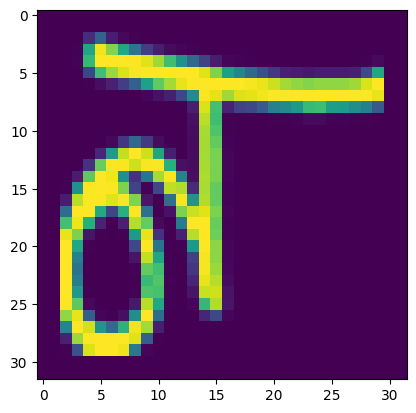

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_20_na/11061.png')
# Display image
plt.imshow(img)
plt.show()

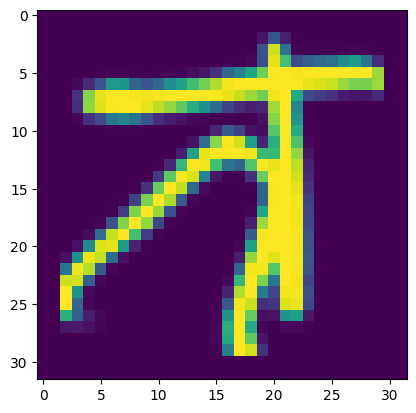

In [6]:
# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_35_tra/102522.png')

# Display image
plt.imshow(img)
plt.show()

In [7]:
hindi_character = 'ञ ट ठ ड ढ ण त थ द ध क न प फ ब भ म य र ल व ख श ष स ह ॠ त्र ज्ञ ग घ ङ च छ ज झ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()

In [8]:
# Generating Class label
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

In [9]:
#Creating Batches
#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory=train_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical')

testting_dataset = image_dataset_from_directory(directory=test_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [10]:
#creating the CNN model
model = Sequential([layers.Rescaling(1./255),])

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layers 3-----------------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
model.add(Flatten())

#Fully Connected Layer 1----------------
model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

#Fully Connected Layer 2----------------
model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())

#Fully Connected Layer 3----------------
model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))

In [11]:
# Compile Model
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [12]:
# Model fitting on the loaded dataset
model_history = model.fit(training_dataset,
                              validation_data = testting_dataset,
                        epochs = 20 ,)

Epoch 1/20
2444/2444 [==============================] - 148s 59ms/step - loss: 0.5046 - accuracy: 0.8736 - val_loss: 0.1531 - val_accuracy: 0.9513
Epoch 2/20
2444/2444 [==============================] - 145s 59ms/step - loss: 0.1398 - accuracy: 0.9572 - val_loss: 0.1081 - val_accuracy: 0.9667
Epoch 3/20
2444/2444 [==============================] - 148s 60ms/step - loss: 0.0995 - accuracy: 0.9695 - val_loss: 0.1150 - val_accuracy: 0.9669
Epoch 4/20
2444/2444 [==============================] - 141s 58ms/step - loss: 0.0820 - accuracy: 0.9744 - val_loss: 0.0823 - val_accuracy: 0.9758
Epoch 5/20
2444/2444 [==============================] - 149s 61ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.1048 - val_accuracy: 0.9686
Epoch 6/20
2444/2444 [==============================] - 146s 60ms/step - loss: 0.0553 - accuracy: 0.9823 - val_loss: 0.0696 - val_accuracy: 0.9790
Epoch 7/20
2444/2444 [==============================] - 148s 60ms/step - loss: 0.0504 - accuracy: 0.9838 - val_loss: 0

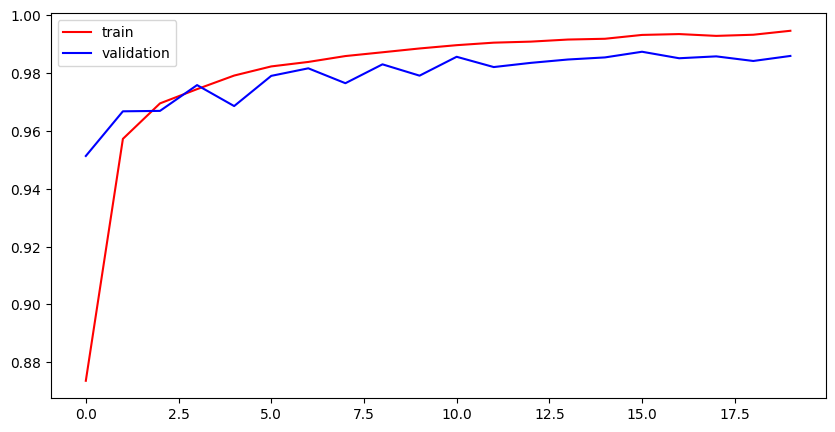

In [13]:
# graph of validation loss and training data accuracy
import matplotlib.pyplot as plt
plt.figure(1, figsize = (10 , 5))
plt.plot(model_history.history['accuracy'],color='red',label='train')
plt.plot(model_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step
Actual_class : २
Predicted Class :  २


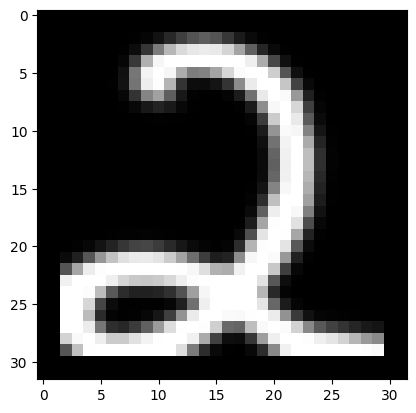

In [14]:
# predictiting digit_2
import cv2
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/digit_2/12535.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : २")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 23ms/step
Actual_class : ञ
Predicted Class :  ञ


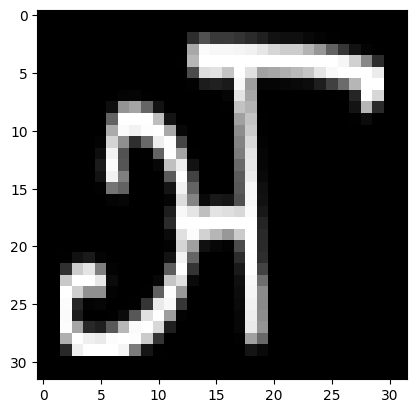

In [15]:
import cv2
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10544.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : ञ")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 21ms/step
Actual_class : ट
Predicted Class :  ट


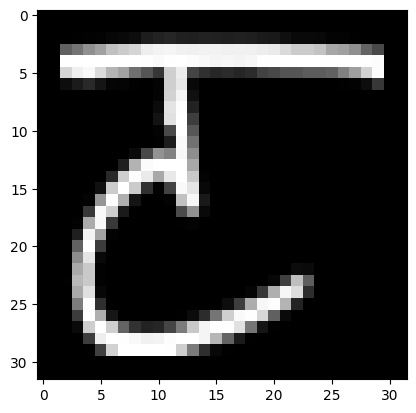

In [16]:
import cv2
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_11_taamatar/10592.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : ट")
print("Predicted Class : " ,hindi_character[class_number])

1/1 [==============================] - 0s 22ms/step
Actual_class : त
Predicted Class :  त


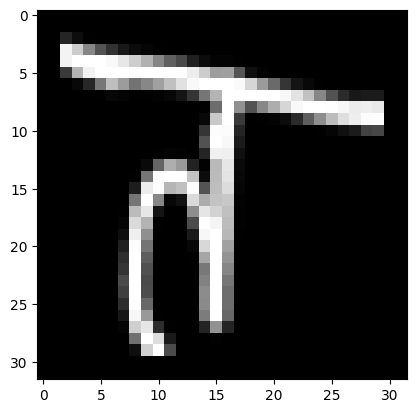

In [20]:
import cv2
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_16_tabala/10803.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model.predict(test_input)
predicted_probability = model.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : त")
print("Predicted Class : " ,hindi_character[class_number])